<a href="https://colab.research.google.com/github/yeonghun00/stock_public/blob/main/optimized_position_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#참고 https://losskatsu.github.io/statistics/prob-distribution/#%EC%B0%B8%EA%B3%A0-%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC%EA%B0%84-%EA%B4%80%EA%B3%84%EB%8F%84

In [2]:
from google.colab import files
uploaded = files.upload()

Saving KOSDAQ.csv to KOSDAQ.csv


In [3]:
key = list(uploaded.items())[0][0]
key

'KOSDAQ.csv'

In [4]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded[key]))
df

,Unnamed: 0,Close,Change,Volume,Value
0,1996-07-02,"1,001.70",+0.17%,143,"1,533"
1,1996-07-03,"1,005.30",+0.36%,115,"1,012"
2,1996-07-04,"1,018.40",+1.30%,235,"5,247"
3,1996-07-05,"1,037.80",+1.90%,59,894
4,1996-07-06,"1,048.80",+1.06%,34,338
...,...,...,...,...,...
6222,2021-04-12,"1,000.65",+1.14%,"1,910,152","11,840,390"
6223,2021-04-13,"1,010.37",+0.97%,"3,655,477","14,516,838"
6224,2021-04-14,"1,014.42",+0.40%,"3,177,259","13,053,979"
6225,2021-04-15,"1,013.90",-0.05%,"2,618,274","13,132,193"


In [5]:
# Formatting
df = df.rename(columns={'Unnamed: 0':'Date'})
for i in df:
  try:
    df[i] = list(map(lambda a : float(str(a).replace(',','')) , df[i].values))
  except:
    pass
df['Change'] = list(map(lambda a : float(eval(str(100) + a.replace('%',''))/100),df['Change'].values))
df

,Date,Close,Change,Volume,Value
0,1996-07-02,1001.70,1.0017,143.0,1533.0
1,1996-07-03,1005.30,1.0036,115.0,1012.0
2,1996-07-04,1018.40,1.0130,235.0,5247.0
3,1996-07-05,1037.80,1.0190,59.0,894.0
4,1996-07-06,1048.80,1.0106,34.0,338.0
...,...,...,...,...,...
6222,2021-04-12,1000.65,1.0114,1910152.0,11840390.0
6223,2021-04-13,1010.37,1.0097,3655477.0,14516838.0
6224,2021-04-14,1014.42,1.0040,3177259.0,13053979.0
6225,2021-04-15,1013.90,0.9995,2618274.0,13132193.0


In [6]:
df['Volume_change'] = np.insert((df['Volume'][1:].values / df['Volume'][:-1].values), 0, 0)
df['Value_change'] = np.insert((df['Value'][1:].values / df['Value'][:-1].values), 0, 0)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


,Date,Close,Change,Volume,Value,Volume_change,Value_change
0,1996-07-02,1001.70,1.0017,143.0,1533.0,0.000000,0.000000
1,1996-07-03,1005.30,1.0036,115.0,1012.0,0.804196,0.660144
2,1996-07-04,1018.40,1.0130,235.0,5247.0,2.043478,5.184783
3,1996-07-05,1037.80,1.0190,59.0,894.0,0.251064,0.170383
4,1996-07-06,1048.80,1.0106,34.0,338.0,0.576271,0.378076
...,...,...,...,...,...,...,...
6222,2021-04-12,1000.65,1.0114,1910152.0,11840390.0,1.198779,1.066184
6223,2021-04-13,1010.37,1.0097,3655477.0,14516838.0,1.913710,1.226044
6224,2021-04-14,1014.42,1.0040,3177259.0,13053979.0,0.869178,0.899230
6225,2021-04-15,1013.90,0.9995,2618274.0,13132193.0,0.824067,1.005992


In [7]:
# 샘플링

sampled_df = df.sample(n=1000)
sampled_df = df
# sampled_df = df

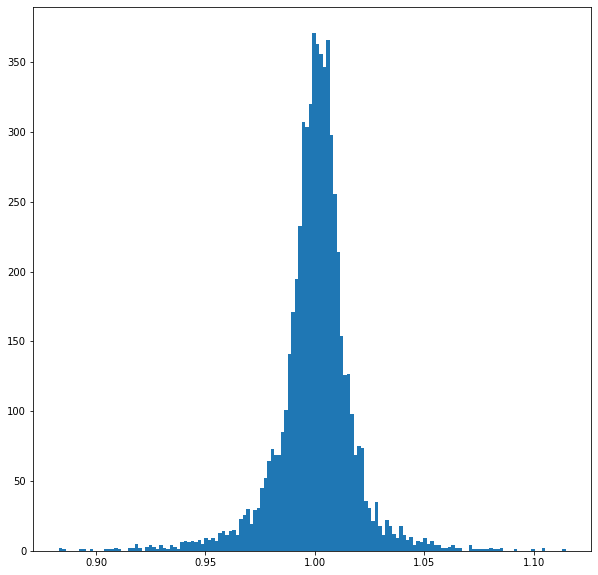

In [8]:
# 확률분포

import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))
plt.hist(sampled_df['Change'], bins='auto')
plt.show()

In [9]:
print('lowest 5th percentile: ', round(np.percentile(sampled_df['Change'], 5), 5))
print('highest 5th percentile: ', round(np.percentile(sampled_df['Change'], 95), 5))
print(sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change']))

lowest 5th percentile:  0.97206
highest 5th percentile:  1.02387
0.5373374016380279


In [10]:
# sampled_df의 Change > 1 전날의 데이터 인덱스
pre_increase = df.iloc[(sampled_df['Change'] > 1).index]['Change'].index[1:] - 1

In [11]:
# 전날 특성상 상승할 확률
print(sum(df.loc[pre_increase]['Change'] > 1) / len(pre_increase))
print(sum(df.loc[pre_increase]['Volume_change'] < 1) / len(pre_increase))

0.5372630902666239
0.5043366527465467


In [12]:
# 기하분포
# 성공의 확률인 p인 독립시행을 성공이 나올 때까지 계속한다고 할 때, 처음 성공까지 총 시도한 횟수 X의 확률분포.
# Pr(X = x) = p*(1-p)^(x-1)
# 𝝁   : 1/p  
# 𝝈^2 : (1-p)/p^2

# +%가 나올때가지 x의 확률
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change'])
print('p: ', p)
print('mean: ', 1/p)
print('variance: ', (1-p)/(p**2))

p:  0.5373374016380279
mean:  1.8610280932456666
variance:  1.602397470603935


In [13]:
x = range(1,10)
pr = list(map(lambda x: p*(1-p)**(x-1) , x))

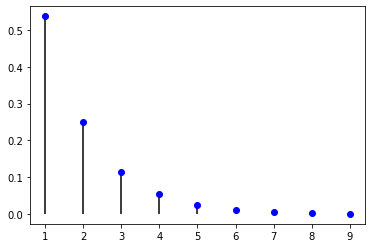

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, pr, 'bo')
plt.vlines(x, 0, pr)
plt.show()

In [15]:
# 음이항분포
# 성공의 확률인 p인 독립시행을 r번째 성공이 나올 때까지 계속한다고 할 때, 처음 성공까지 총 시도한 횟수 X의 확률분포.
# Pr(X = x) = (x-1)C(r-1) * p^r * (1-p)^(x-r)
# 𝝁   : r/p  
# 𝝈^2 : r*(1-p)/p^2

# 5번째 +%가 나올때가지 x의 확률
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change'])
r = 3
print('p: ', p)
print('mean: ', r/p)
print('variance: ', r*(1-p)/(p**2))

p:  0.5373374016380279
mean:  5.583084279737
variance:  4.807192411811805


In [16]:
import math

def nCr(n,r):
    f = math.factorial
    return f(n) / (f(r) * f(n-r))

x = range(r,50)
pr = list(map(lambda x: nCr(x-1,r-1) * p**r * (1-p)**(x-r) , x))

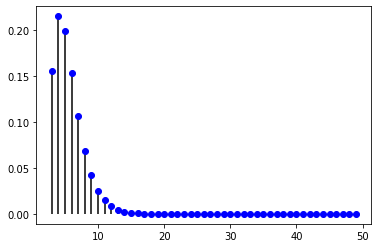

In [17]:
import matplotlib.pyplot as plt

pr = list(map(lambda x: nCr(x-1,r-1) * p**r * (1-p)**(x-r) , x))
plt.plot(x, pr, 'bo')
plt.vlines(x, 0, pr)
plt.show()

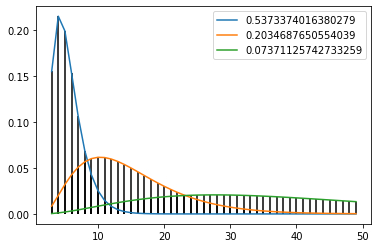

In [18]:
import matplotlib.pyplot as plt

# 각각 0%, 1%, 2% 이상 r번의 시도에 나올 확률 
p = sum(sampled_df['Change'] > 1.0) / len(sampled_df['Change']), sum(sampled_df['Change'] > 1.01) / len(sampled_df['Change']), \
sum(sampled_df['Change'] > 1.02) / len(sampled_df['Change']) 

for i in range(len(p)):
  pr = list(map(lambda x: nCr(x-1,r-1) * p[i]**r * (1-p[i])**(x-r) , x))
  plt.plot(x, pr)
  plt.vlines(x, 0, pr)
plt.legend(p)
plt.show()

In [24]:
# 메모용
#
# 초기하분포
# 비복원추출에서 n개 중에 m개가 원하는 것이고, k번 추출했을때 원하는 것 x개가 뽑힐 확률의 분포이다.
# Pr(X = x) = nCx * (n-m)C(k-x) / nCk
# 𝝁   : k*m/n  
# 𝝈^2 : (k*m/n) * ((n-m)*(n-k)/(n*(n-1)))

# 5번째 +%가 나올때가지 x의 확률
x = 1
n = 3
m = 2
k = 6
#print('p: ', nCr(n,x) * nCr(n-m,k-x) / nCr(n,k)) 오류 뜸 ㅆ
print('mean: ', k*m/n)
print('variance: ', ((k*m/n) * ((n-m)*(n-k))/(n*(n-x))))

mean:  4.0
variance:  -2.0
